In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data = pd.read_csv('googleplaystore.csv')
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [3]:
print(data.shape)
data.info()

(10841, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
App               10841 non-null object
Category          10841 non-null object
Rating            9367 non-null float64
Reviews           10841 non-null object
Size              10841 non-null object
Installs          10841 non-null object
Type              10840 non-null object
Price             10841 non-null object
Content Rating    10840 non-null object
Genres            10841 non-null object
Last Updated      10841 non-null object
Current Ver       10833 non-null object
Android Ver       10838 non-null object
dtypes: float64(1), object(12)
memory usage: 592.9+ KB


In [4]:
df=data.dropna(subset=['Rating'])
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    1
Genres            0
Last Updated      0
Current Ver       4
Android Ver       3
dtype: int64

In [5]:
df[df['Android Ver'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11M,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2.1M,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [6]:
df['Android Ver'].value_counts()

4.1 and up            2059
Varies with device    1319
4.0.3 and up          1240
4.0 and up            1131
4.4 and up             875
2.3 and up             582
5.0 and up             535
4.2 and up             338
2.3.3 and up           240
3.0 and up             211
2.2 and up             208
4.3 and up             207
2.1 and up             113
1.6 and up              87
6.0 and up              48
7.0 and up              41
3.2 and up              31
2.0 and up              27
5.1 and up              18
1.5 and up              16
3.1 and up               8
2.0.1 and up             7
4.4W and up              6
8.0 and up               5
7.1 and up               3
5.0 - 8.0                2
4.0.3 - 7.1.1            2
1.0 and up               2
7.0 - 7.1.1              1
4.1 - 7.1.1              1
5.0 - 6.0                1
Name: Android Ver, dtype: int64

In [7]:
df['Android Ver'].mode()

0    4.1 and up
dtype: object

In [8]:
df['Android Ver']=df['Android Ver'].fillna(df['Android Ver'].mode()[0])


/home/hg/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [9]:
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    1
Genres            0
Last Updated      0
Current Ver       4
Android Ver       0
dtype: int64

In [10]:
df[df['Content Rating'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,4.1 and up


In [11]:
df=df.dropna(subset=['Content Rating'])

In [12]:
df['Current Ver']=df['Current Ver'].fillna(df['Current Ver'].mode()[0])

In [13]:
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [14]:
df['Price'].value_counts()

0        8719
$2.99     114
$0.99     107
$4.99      70
$1.99      59
         ... 
$2.95       1
$3.02       1
$4.84       1
$4.77       1
$1.76       1
Name: Price, Length: 73, dtype: int64

In [15]:
df['Price']=df['Price'].apply(lambda x: float(x.replace('$','')))
df.describe()

,Rating,Price
count,9366.000000,9366.000000
mean,4.191757,0.960928
std,0.515219,15.816585
min,1.000000,0.000000
25%,4.000000,0.000000
50%,4.300000,0.000000
75%,4.500000,0.000000
max,5.000000,400.000000


In [16]:
 df['Reviews'].value_counts()

2          83
3          78
4          74
5          74
1          67
           ..
896118      1
108613      1
7529865     1
160164      1
728         1
Name: Reviews, Length: 5992, dtype: int64

In [17]:
#هل كل القيم نصوص
df['Reviews'].str.isdigit().sum()==df['Reviews'].shape[0]

True

In [18]:
df['Reviews']=df['Reviews'].astype('int64')

In [19]:
df.describe()

,Rating,Reviews,Price
count,9366.000000,9.366000e+03,9366.000000
mean,4.191757,5.140498e+05,0.960928
std,0.515219,3.144042e+06,15.816585
min,1.000000,1.000000e+00,0.000000
25%,4.000000,1.862500e+02,0.000000
50%,4.300000,5.930500e+03,0.000000
75%,4.500000,8.153275e+04,0.000000
max,5.000000,7.815831e+07,400.000000


In [20]:
 df['Installs'].value_counts()

1,000,000+        1577
10,000,000+       1252
100,000+          1150
10,000+           1010
5,000,000+         752
1,000+             713
500,000+           538
50,000+            467
5,000+             432
100,000,000+       409
100+               309
50,000,000+        289
500+               201
500,000,000+        72
10+                 69
1,000,000,000+      58
50+                 56
5+                   9
1+                   3
Name: Installs, dtype: int64

In [21]:
df['Installs']=df['Installs'].apply(lambda x: int(x.replace(',','').replace('+','')))

In [22]:
 df['Size'].value_counts()

Varies with device    1637
14M                    166
12M                    161
11M                    160
15M                    159
                      ... 
716k                     1
683k                     1
288k                     1
208k                     1
460k                     1
Name: Size, Length: 414, dtype: int64

In [23]:
df['Size'].sample(10)

4491                   26M
8352                   36M
5628                  6.5M
4503                   19M
8649                  1.9M
8240                  3.0M
4541                  203k
5425    Varies with device
772                   4.4M
2797                   18M
Name: Size, dtype: object

In [24]:
def fix_size(x):
    if x[-1]=='M':
        x=float(x.replace('M',''))*1000
    elif x[-1]=='k':
        x=float(x.replace('k',''))
    else:
        x=None
    return x

In [25]:
 df['Size']=df['Size'].apply(fix_size)

In [26]:
 df['Size'].isnull().sum()

1637

In [27]:
 df['Size']=df['Size'].fillna(df['Size'].mean())

In [28]:
df.describe()

,Rating,Reviews,Size,Installs,Price
count,9366.000000,9.366000e+03,9366.000000,9.366000e+03,9366.000000
mean,4.191757,5.140498e+05,22957.606870,1.789744e+07,0.960928
std,0.515219,3.144042e+06,21298.008688,9.123822e+07,15.816585
min,1.000000,1.000000e+00,8.500000,1.000000e+00,0.000000
25%,4.000000,1.862500e+02,6600.000000,1.000000e+04,0.000000
50%,4.300000,5.930500e+03,21000.000000,5.000000e+05,0.000000
75%,4.500000,8.153275e+04,27000.000000,5.000000e+06,0.000000
max,5.000000,7.815831e+07,100000.000000,1.000000e+09,400.000000


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9366 entries, 0 to 10840
Data columns (total 13 columns):
App               9366 non-null object
Category          9366 non-null object
Rating            9366 non-null float64
Reviews           9366 non-null int64
Size              9366 non-null float64
Installs          9366 non-null int64
Type              9366 non-null object
Price             9366 non-null float64
Content Rating    9366 non-null object
Genres            9366 non-null object
Last Updated      9366 non-null object
Current Ver       9366 non-null object
Android Ver       9366 non-null object
dtypes: float64(3), int64(2), object(8)
memory usage: 731.7+ KB


In [30]:
df=df[df.Reviews<=df.Installs]
df.shape

(9359, 13)

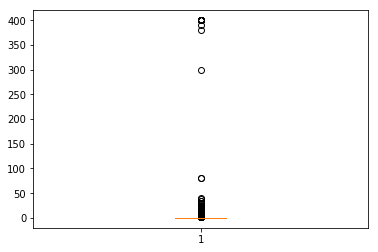

In [31]:
plt.boxplot(df['Price'])
plt.show()

In [32]:
df[df['Price']>100]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4197,most expensive app (H),FAMILY,4.3,6,1500.0,100,Paid,399.99,Everyone,Entertainment,"July 16, 2018",1.0,7.0 and up
4362,💎 I'm rich,LIFESTYLE,3.8,718,26000.0,10000,Paid,399.99,Everyone,Lifestyle,"March 11, 2018",1.0.0,4.4 and up
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7300.0,10000,Paid,400.00,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1 and up
5351,I am rich,LIFESTYLE,3.8,3547,1800.0,100000,Paid,399.99,Everyone,Lifestyle,"January 12, 2018",2.0,4.0.3 and up
5354,I am Rich Plus,FAMILY,4.0,856,8700.0,10000,Paid,399.99,Everyone,Entertainment,"May 19, 2018",3.0,4.4 and up
5355,I am rich VIP,LIFESTYLE,3.8,411,2600.0,10000,Paid,299.99,Everyone,Lifestyle,"July 21, 2018",1.1.1,4.3 and up
5356,I Am Rich Premium,FINANCE,4.1,1867,4700.0,50000,Paid,399.99,Everyone,Finance,"November 12, 2017",1.6,4.0 and up
5357,I am extremely Rich,LIFESTYLE,2.9,41,2900.0,1000,Paid,379.99,Everyone,Lifestyle,"July 1, 2018",1.0,4.0 and up
5358,I am Rich!,FINANCE,3.8,93,22000.0,1000,Paid,399.99,Everyone,Finance,"December 11, 2017",1.0,4.1 and up
5359,I am rich(premium),FINANCE,3.5,472,965.0,5000,Paid,399.99,Everyone,Finance,"May 1, 2017",3.4,4.4 and up


In [33]:
df=df[df['Price']<=10]

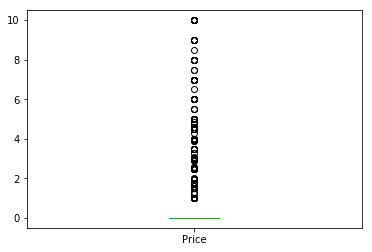

In [34]:
df[df['Price']<10].Price.plot.box()
plt.show()

In [35]:
df[df['Price']<=10].describe()

,Rating,Reviews,Size,Installs,Price
count,9289.000000,9.289000e+03,9289.000000,9.289000e+03,9289.000000
mean,4.191474,5.183027e+05,22986.206494,1.804568e+07,0.208083
std,0.515267,3.156699e+06,21301.814915,9.160104e+07,0.972313
min,1.000000,1.000000e+00,8.500000,5.000000e+00,0.000000
25%,4.000000,1.940000e+02,6600.000000,1.000000e+04,0.000000
50%,4.300000,6.148000e+03,21000.000000,5.000000e+05,0.000000
75%,4.500000,8.348800e+04,27000.000000,5.000000e+06,0.000000
max,5.000000,7.815831e+07,100000.000000,1.000000e+09,10.000000


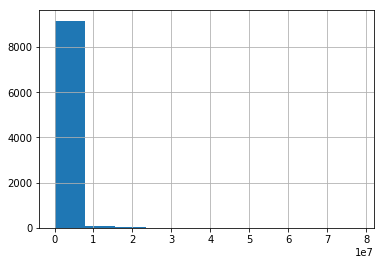

In [36]:
df['Reviews'].hist()

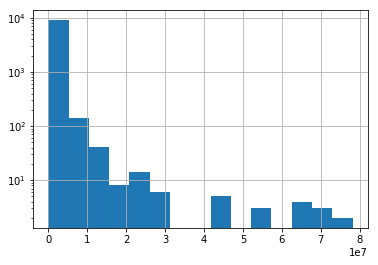

In [37]:
df['Reviews'].hist(bins=15,log=True)

In [38]:
import seaborn as sns

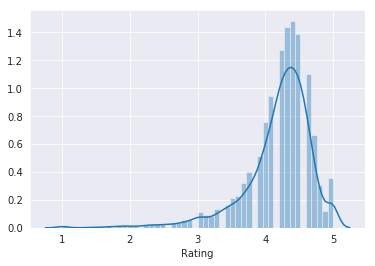

In [39]:
sns.set_style('darkgrid')
sns.distplot(df.Rating)

In [40]:
df['Content Rating'].value_counts()

Everyone           7355
Teen               1077
Mature 17+          458
Everyone 10+        395
Adults only 18+       3
Unrated               1
Name: Content Rating, dtype: int64

In [43]:
df=df[df['Content Rating']!='Adults only 18+']
df=df[df['Content Rating']!='Unrated']
df['Content Rating'].value_counts()

Everyone        7355
Teen            1077
Mature 17+       458
Everyone 10+     395
Name: Content Rating, dtype: int64

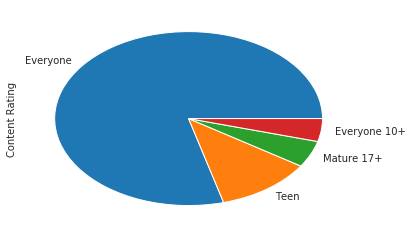

In [44]:
df['Content Rating'].value_counts().plot.pie()

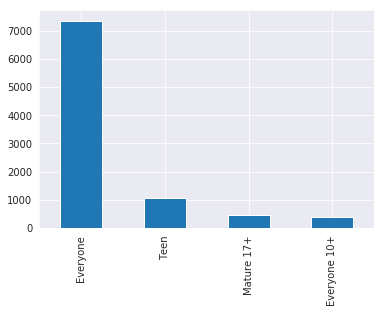

In [45]:
df['Content Rating'].value_counts().plot.bar()

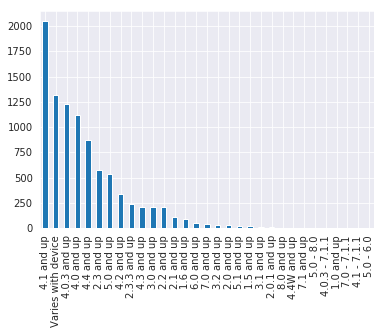

In [46]:
df['Android Ver'].value_counts().plot.bar() 

In [47]:
df.describe()

,Rating,Reviews,Size,Installs,Price
count,9285.000000,9.285000e+03,9285.000000,9.285000e+03,9285.000000
mean,4.191449,5.185171e+05,22988.003718,1.805323e+07,0.208172
std,0.515334,3.157362e+06,21304.060705,9.162005e+07,0.972513
min,1.000000,1.000000e+00,8.500000,5.000000e+00,0.000000
25%,4.000000,1.940000e+02,6600.000000,1.000000e+04,0.000000
50%,4.300000,6.145000e+03,21000.000000,5.000000e+05,0.000000
75%,4.500000,8.348800e+04,27000.000000,5.000000e+06,0.000000
max,5.000000,7.815831e+07,100000.000000,1.000000e+09,10.000000


<function matplotlib.pyplot.show(*args, **kw)>

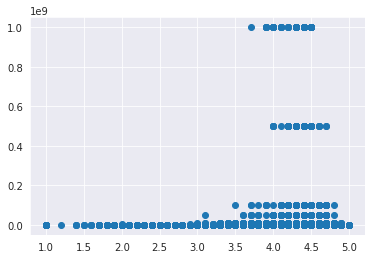

In [51]:
plt.scatter(df.Rating,df.Installs)
plt.show

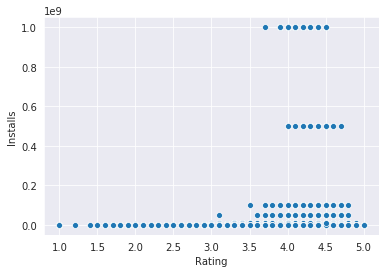

In [53]:
sns.scatterplot(df.Rating,df.Installs)
plt.show()

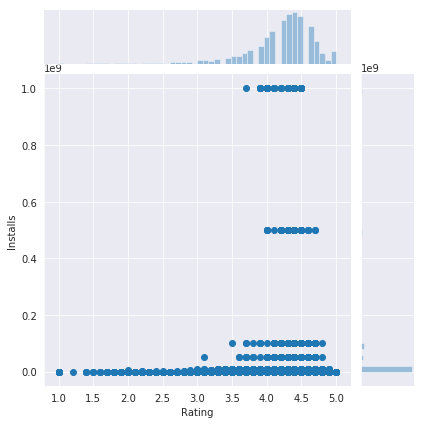

In [54]:
sns.jointplot(df.Rating,df.Installs)

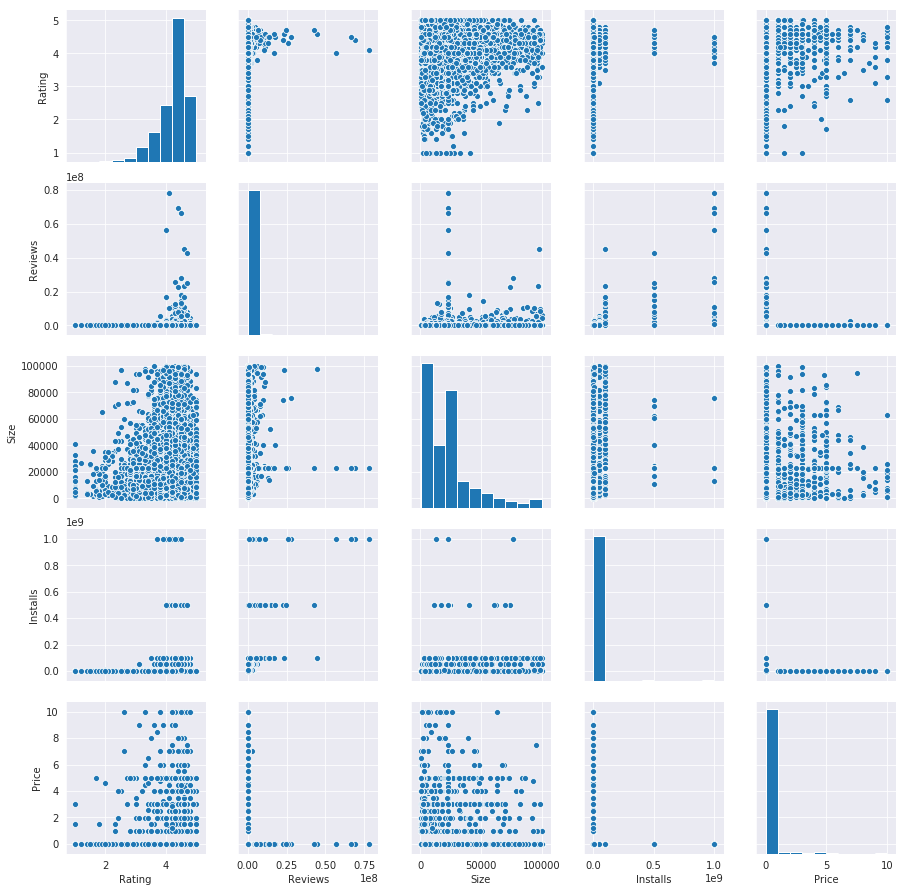

In [57]:
sns.pairplot(df[['Rating','Reviews','Size','Installs','Price']])